In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../datasets/Ads_CTR_Optimisation.csv')

In [3]:
import math

In [6]:
N = 10000   #number of users
d = 10      #number of ads
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if numbers_of_selections[i]>0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_rewards = total_rewards + reward


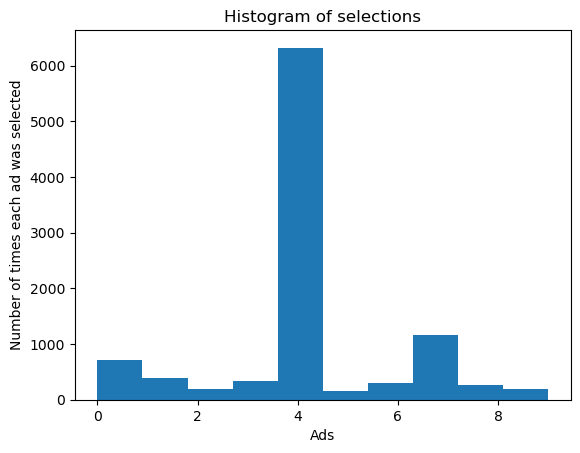

In [7]:
plt.hist(ads_selected)
plt.title("Histogram of selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()